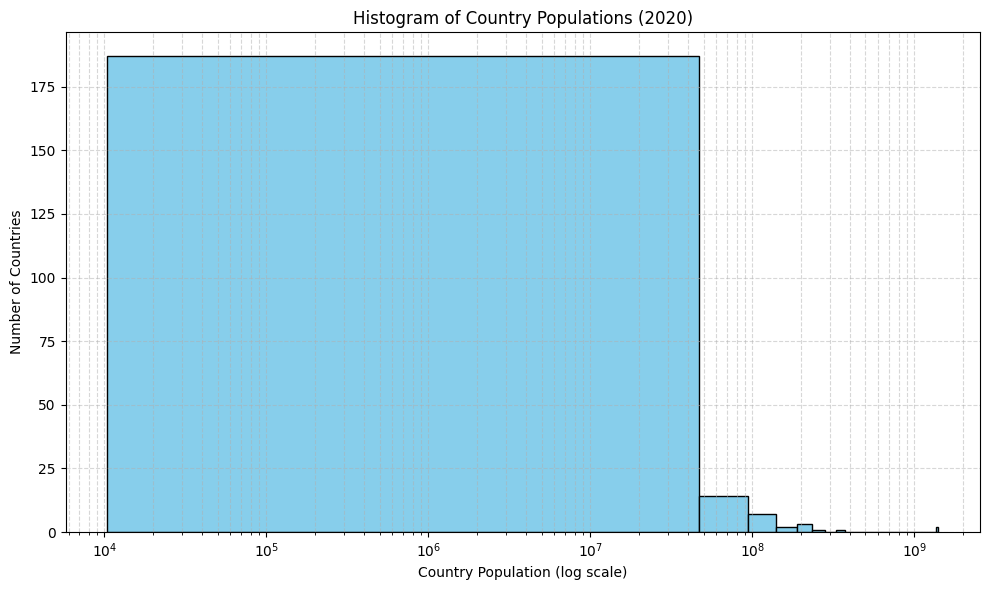

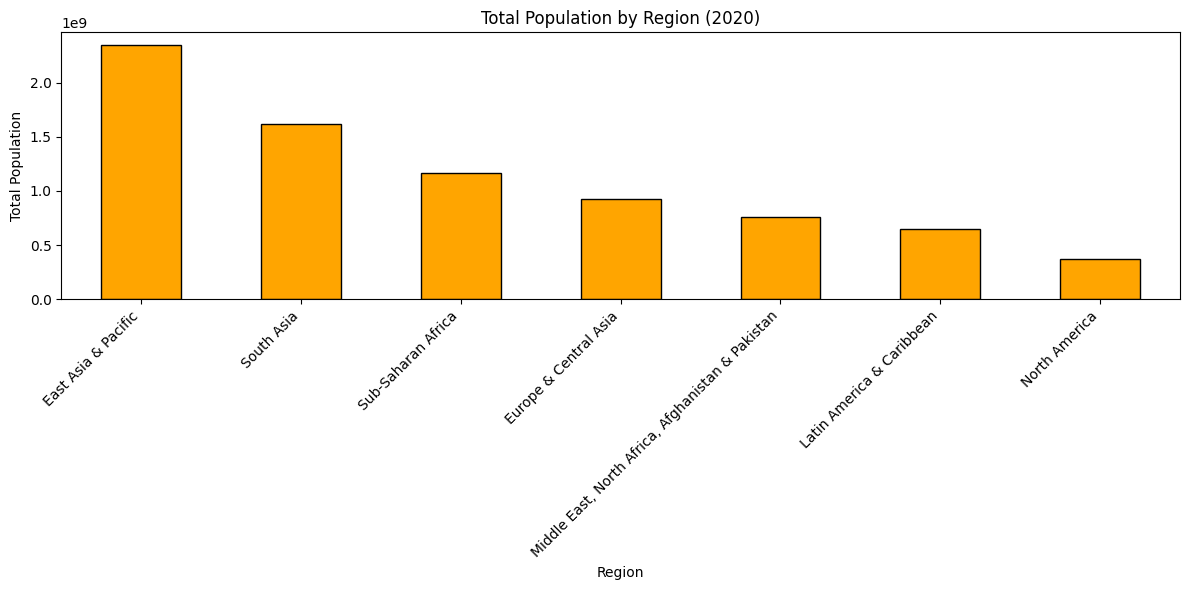

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load main population data
pop_df = pd.read_csv('/content/API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv', skiprows=4)

# Load country metadata for regions
meta_df = pd.read_csv('/content/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_38144.csv')

# Pick population for the year 2020
year = '2020'
pop_df = pop_df[['Country Name', 'Country Code', year]]
pop_df = pop_df.dropna(subset=[year])

# Merge with metadata on country code
merged_df = pop_df.merge(meta_df[['Country Code', 'Region']], on='Country Code', how='left')

# Drop aggregates (e.g., "World", "High income") with no region
merged_df = merged_df.dropna(subset=['Region'])

# Rename column for clarity
merged_df = merged_df.rename(columns={year: 'Population'})

# -------------------
# Plot 1: Histogram of countries' populations
# -------------------
plt.figure(figsize=(10,6))
plt.hist(merged_df['Population'], bins=30, color='skyblue', edgecolor='black')
plt.xscale('log')  # log scale helps with wide range of populations
plt.xlabel('Country Population (log scale)')
plt.ylabel('Number of Countries')
plt.title(f'Histogram of Country Populations ({year})')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# -------------------
# Plot 2: Bar chart of total population by region
# -------------------
region_group = merged_df.groupby('Region')['Population'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
region_group.plot(kind='bar', color='orange', edgecolor='black')
plt.ylabel('Total Population')
plt.title(f'Total Population by Region ({year})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
